In [2]:
import numpy as np
import pandas as pd
#for Kmeans clustering
from sklearn.cluster import KMeans
# for minibatch kmenas clustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#to find number of days between created and updated project repos
from datetime import datetime
from datetime import date
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
#use this #use this "conda install -c conda-forge genism" or pip install genism
import gensim
from gensim.models import Word2Vec
from adjustText import adjust_text
#for dimensionality reduction of the extracted features
from sklearn.manifold import TSNE
#for visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading project metadata from github projects
df = pd.read_csv("GitHub_Projects.csv")
#getting number of days the project been created and last updated
updated = pd.to_datetime(df["updated_at"]).dt.date
created = pd.to_datetime(df["created_at"]).dt.date
days = updated-created
days = pd.to_numeric(days.dt.days, downcast='integer')
df["updated-created"] = days 
df["desc_word_count"] = df["Description"].apply(lambda x: len(str(x).split()))
#data = df[["repo_name", "Description", "stargazers_count", "forks_count", "num_model_file", "updated-created"]]
#data.head()
# data.to_csv("numerical_cluster.csv")

In [4]:
data1 = df[["stargazers_count", "forks_count", "num_model_file", "updated-created", "desc_word_count"]]
data1.head()

,stargazers_count,forks_count,num_model_file,updated-created,desc_word_count
0,0,7,3,2459,11
1,4,18,22,3085,9
2,7,5,11,2684,7
3,1,0,1,545,6
4,27,17,2,2415,29


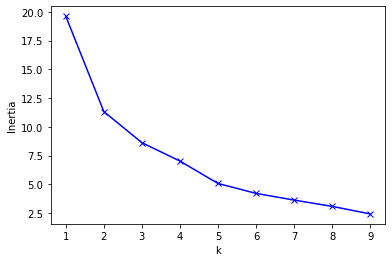

In [5]:
#inspired from https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
scaler = preprocessing.MinMaxScaler()
features_normal = scaler.fit_transform(data1)
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features_normal)
    kmeanModel.fit(features_normal)
    inertia.append(kmeanModel.inertia_)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [6]:
#from the above elbow method we got the number of clusters to be 2 as the elbow is forming at k=2
kmeans = KMeans(n_clusters=2).fit(features_normal)
labels = pd.DataFrame(kmeans.labels_)
df["numeric_cluster"] = labels
onlynumericclusters = pd.concat((data1, labels),axis=1)
onlynumericclusters = onlynumericclusters.rename({0:'labels'},axis=1)
onlynumericclusters.head()
df_num_cluster = df.groupby(df.numeric_cluster)
df_num_cluster0 = df_num_cluster.get_group(0)
df_num_cluster1 = df_num_cluster.get_group(1)
df_num_cluster0.to_csv("github_num_cluster_academic.csv")
df_num_cluster1.to_csv("github_num_cluster_industrial.csv")
#df_num_cluster1.describe()
#df_num_cluster0.describe()

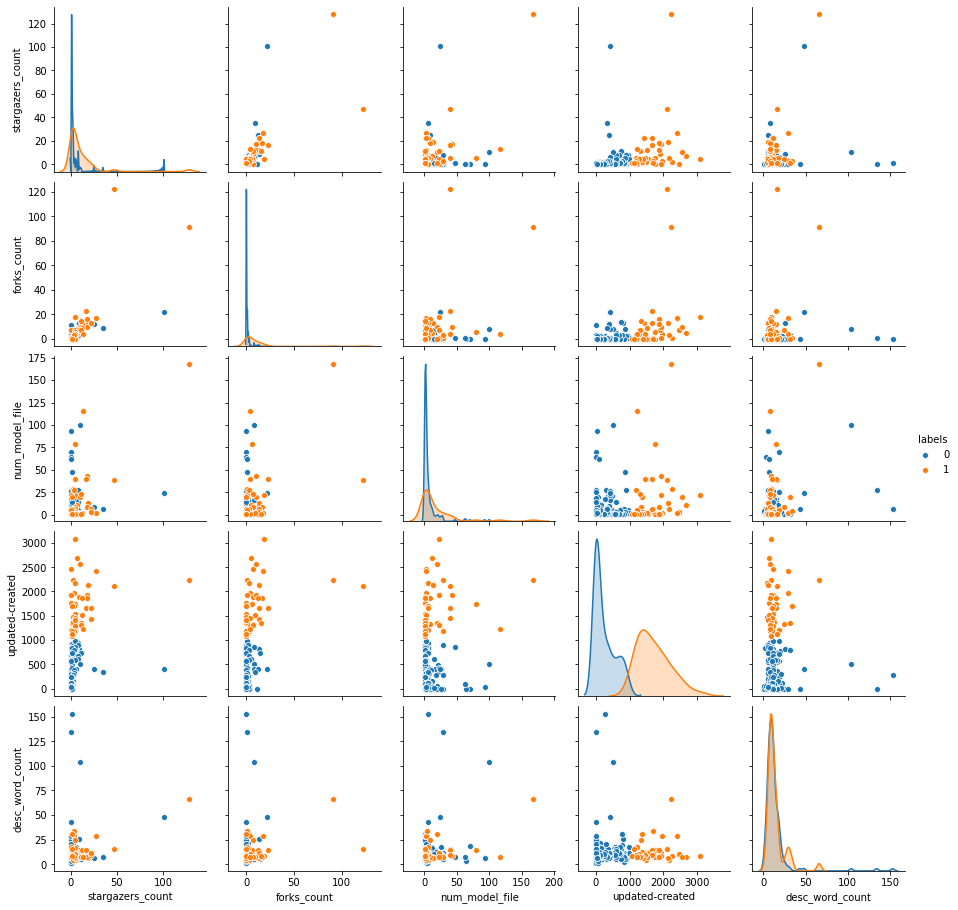

In [7]:
#trying to visualize how projects have been distributed in regards to the selected numeric features in the data.
sns.pairplot(onlynumericclusters,hue='labels')

In [8]:
#reading project metadata from github projects
df_matlab = pd.read_csv("MATC_Projects.csv")
df_matlab["content_word_count"] = df_matlab["content"].apply(lambda x: len(str(x).split()))
data_matlab = df_matlab[["no_of_comments", "no_of_ratings", "num_model_file", "content_word_count", "downloads"]]
data_matlab.head()

,no_of_comments,no_of_ratings,num_model_file,content_word_count,downloads
0,18,46,1,46,3
1,3,4,15,91,1
2,1,2,2,94,2
3,21,22,2,59,12
4,11,27,2,52,2


In [11]:
#inspired from https://www.kaggle.com/ellecf/visualizing-multidimensional-clusters
scaler_matlab = preprocessing.MinMaxScaler()
features_normal_matlab = scaler_matlab.fit_transform(data_matlab)
kmeans_matlab = KMeans(n_clusters=2).fit(features_normal_matlab)
labels_matlab = pd.DataFrame(kmeans_matlab.labels_)
df_matlab["numeric_cluster"] = labels_matlab
matlabnumericclusters = pd.concat((data_matlab, labels_matlab),axis=1)
matlabnumericclusters = matlabnumericclusters.rename({0:'labels_matlab'},axis=1)
matlabnumericclusters.head()
df_num_cluster_matlab = df_matlab.groupby(df_matlab.numeric_cluster)
df_num_cluster_matlab0 = df_num_cluster_matlab.get_group(0)
df_num_cluster_matlab1 = df_num_cluster_matlab.get_group(1)
df_num_cluster_matlab0.to_csv("matlab_num_cluster_0.csv")
df_num_cluster_matlab1.to_csv("matlab_num_cluster_1.csv")
#sns.pairplot(matlabnumericclusters,hue='labels_matlab')

In [8]:
#Iteration 1 end, work for Iteration 2

# #Text preprocessing code reference from: https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e
# def preprocess(text):
#     text = text.lower() 
#     text=text.strip()  
#     text=re.compile('<.*?>').sub('', text) 
#     text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
#     text = re.sub('\s+', ' ', text)  
#     text = re.sub(r'\[[0-9]*\]',' ',text) 
#     text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
#     text = re.sub(r'\d',' ',text) 
#     text = re.sub(r'\s+',' ',text) 
#     return text

 
# # STOPWORD REMOVAL
# def stopword(string):
#     stopwords = nltk.corpus.stopwords.words('english')
#     newStopWords = ['simulink','matlab', 'control', 'model', 'design', 'analysis']
#     stopwords.extend(newStopWords)
#     stop_words = set(stopwords)
#     a= [i for i in string.split() if i not in stopwords]
#     return ' '.join(a)
# #LEMMATIZATION
# # Initialize the lemmatizer
# wl = WordNetLemmatizer()
 
# # This is a helper function to map NTLK position tags
# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN
# # Tokenize the sentence
# def lemmatizer(string):
#     word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
#     a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
#     return " ".join(a)
# def finalpreprocess(string):
#     return lemmatizer(stopword(preprocess(string)))

# #adding description word count as one more attribute to cluster
# 
# #using the above preprocessing to convert all the descriptions to base form words.
# df["clean_description"] = df["Description"].apply(lambda x: finalpreprocess(x))
# #print( df["Description"][0], df["desc_word_count"][0]) 

# #Word2Vec
# # Word2Vec runs on tokenized sentences
# df["clean_description_tokens"] = [nltk.word_tokenize(i) for i in df["clean_description"]] 

# #Tf-Idf
# tfidf_vectorizer = TfidfVectorizer(use_idf=True)
# description_vectors_tfidf = tfidf_vectorizer.fit_transform(df["clean_description"])

# #Word2Vec model
# class MeanEmbeddingVectorizer(object):
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         # if a text is empty we should return a vector of zeros
#         # with the same dimensionality as all the other vectors
#         self.dim = len(next(iter(word2vec.values())))
#     def fit(self, X, y):
#         return self
#     def transform(self, X):
#         return np.array([
#             np.mean([self.word2vec[w] for w in words if w in self.word2vec]
#                     or [np.zeros(self.dim)], axis=0)
#             for words in X
#         ])
# model = Word2Vec(df['clean_description_tokens'],min_count=1)
# w2v = dict(zip(model.wv.index2word, model.wv.syn0))  
# modelw = MeanEmbeddingVectorizer(w2v)
# description_vectors_w2v = modelw.transform(df["clean_description_tokens"])

<ipython-input-8-39fa1db348a5>:77: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  w2v = dict(zip(model.wv.index2word, model.wv.syn0))


In [9]:
# print("description_vectors_w2v", description_vectors_w2v.shape)
# print(type(description_vectors_w2v))
# print("df",df.shape)
# print(type(df))
# #print(model.vector_size)
# print(description_vectors_w2v)

description_vectors_w2v (225, 100)
<class 'numpy.ndarray'>
df (225, 30)
<class 'pandas.core.frame.DataFrame'>
[[ 6.87217835e-05  2.87643226e-04  8.73766548e-04 ... -5.78318664e-04
  -2.29658606e-03  3.00799729e-03]
 [ 2.78443960e-03  3.39832273e-04  6.97903975e-04 ...  1.99909249e-04
  -9.59944038e-04  1.10820716e-03]
 [-1.21064717e-04 -8.63702502e-04  2.11759703e-03 ...  6.44592394e-04
  -8.99381586e-04 -2.38805148e-03]
 ...
 [-1.05070940e-03 -7.29439489e-04 -5.79520311e-05 ...  5.53994498e-04
  -1.03011646e-03  2.01383187e-03]
 [-1.60745624e-03 -1.35099422e-03  1.86110090e-04 ...  7.64599536e-04
  -8.03280447e-04  2.40788399e-03]
 [ 3.17733199e-03  2.98541388e-03  3.74123541e-04 ... -1.36936828e-03
   8.64006986e-04  3.86949076e-04]]


In [10]:
# # Inspired from https://towardsdatascience.com/using-word2vec-to-analyze-news-headlines-and-predict-article-success-cdeda5f14751
# # Create a list of strings, one for each description
# desc_list = [desc for desc in df["Description"]]
# # Collapse the list of strings into a single long string for processing
# big_desc_string = ''.join(desc_list)
# # Tokenize the string into words
# tokens = word_tokenize(big_desc_string)
# # Remove non-alphabetic tokens, such as punctuation
# words = [word.lower() for word in tokens if word.isalpha()]
# # Filter out stopwords
# stopwords = nltk.corpus.stopwords.words('english')
# newStopWords = ['simulink','matlab', 'control', 'model', 'design', 'analysis']
# stopwords.extend(newStopWords)
# stop_words = set(stopwords)
# words = [word for word in words if not word in stop_words]

# vector_list = [model[word] for word in words if word in model.wv.vocab]
# # Create a list of the words corresponding to these vectors
# words_filtered = [word for word in words if word in model.wv.vocab]
# # Zip the words together with their vector representations
# word_vec_zip = zip(words_filtered, vector_list)
# # Cast to a dict so we can turn it into a DataFrame
# word_vec_dict = dict(word_vec_zip)
# df1 = pd.DataFrame.from_dict(word_vec_dict)
# # print(df1.head())
# #type(df1)
# df.reset_index(drop=True, inplace=True)
# df1.reset_index(drop=True, inplace=True)
# #print(df1.describe())
# #print(df1.head())
# #print(df.head())
# #concatenating the original dataframe and the features dataframe to try clustering based on all the features but using all the features is not desirable so commenting out
# #df2 = pd.concat([df,df1], axis=1)
# print(df1.head())
# # print(model)
# # print(list(model.wv.vocab))

       ecan   library         c  simulator     coder    target        ti  \
0 -0.001407  0.003312 -0.003008   0.002662  0.000858 -0.003967  0.001013   
1  0.004785 -0.004720  0.000824   0.001013  0.001151 -0.002880 -0.001387   
2 -0.003251  0.002218  0.004286   0.002567  0.003690 -0.003270  0.002368   
3 -0.001780  0.001624  0.004099  -0.003665 -0.000739 -0.000325  0.002899   
4 -0.003697 -0.000025 -0.004203   0.002535 -0.001901  0.001578 -0.001438   

       open    source  software  ...    verify       bus  conversion  \
0  0.002410  0.001114 -0.000591  ... -0.003639 -0.000915   -0.004075   
1 -0.001057  0.001785 -0.003428  ...  0.004854  0.003593   -0.000101   
2  0.001590  0.002022 -0.004054  ...  0.000002 -0.004058   -0.001710   
3 -0.003883 -0.003533 -0.004956  ...  0.000577  0.002749    0.004615   
4  0.000324 -0.000298 -0.003097  ... -0.001263 -0.000744    0.001115   

   superconducting     fault   current   limiter   ccntrol  vuarious      dual  
0         0.002010 -0.001667 

<ipython-input-10-c8d1f0e203af>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector_list = [model[word] for word in words if word in model.wv.vocab]


In [11]:
# # Initialize t-SNE
# tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
# tsne_df = tsne.fit_transform(df1)

In [12]:
# print(tsne_df.shape)
# tsne_df = pd.DataFrame(tsne_df, columns = ['desc_num_1', 'desc_num_2'])
# tsne_df = tsne_df.astype(np.float).applymap('{:,.4f}'.format)
# #print(tsne_df.dtypes)
# replaceinf = tsne_df.replace([np.inf, -np.inf], np.nan, inplace=True)
# dropna = tsne_df.fillna(tsne_df.mean())
# print(dropna, replaceinf)
# #print(tsne_df)
# #to find if any infinite values or nan values
# #print(np.any(np.isnan(tsne_df)))
# #print(np.all(np.isfinite(tsne_df)))
# #print(tsne_df.head())
# #concatenating the original dataframe and the dimension reduced features dataframe 
# df_tsne_df1 = pd.concat([tsne_df,df], axis=1)
# #print(df_tsne_df1.head())

(100, 2)
   desc_num_1 desc_num_2
0      1.9148     1.1621
1      1.9138     1.1571
2      1.9156     1.1608
3      1.9145     1.1581
4      1.9135     1.1638
..        ...        ...
95     1.9149     1.1618
96     1.9146     1.1569
97     1.9096     1.1577
98     1.9108     1.1574
99     1.9092     1.1619

[100 rows x 2 columns] None


In [13]:
# #removing all columns except for the numeric columns (converted and original)
# df3 = df_tsne_df1.drop(["numeric_cluster","clean_description_tokens","clean_description","Description","id","repo_name", "owner_name",  "is_private", "project_url", "is_forked", "api_url", "created_at", "updated_at", "pushed_at"
# , "homepage_url", "size_in_kb", "language", "open_issues_count", "master_branch", "default_branch", "Topics", "license", "model_files", "version_sha"
# ], axis = 1)
# df3.head()

,desc_num_1,desc_num_2,stargazers_count,watchers_count,forks_count,num_model_file,updated-created,desc_word_count
0,1.9148,1.1621,0,0,7,3,2459,11
1,1.9138,1.1571,4,4,18,22,3085,9
2,1.9156,1.1608,7,7,5,11,2684,7
3,1.9145,1.1581,1,1,0,1,545,6
4,1.9135,1.1638,27,27,17,2,2415,29


In [58]:
# scaler = preprocessing.MinMaxScaler()
# features_normal1 = scaler.fit_transform(df3)
# inertia = []
# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(features_normal1)
#     kmeanModel.fit(features_normal)
#     inertia.append(kmeanModel.inertia_)
# plt.plot(K, inertia, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.show()

In [59]:
# sns.set()
# # Initialize figure
# fig, ax = plt.subplots(figsize = (11.7, 8.27))
# sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# # Import adjustText, initialize list of texts
# #use this "conda install -c conda-forge adjusttext" or pip install adjusttext

# texts = []
# words_to_plot = list(np.arange(0, 100, 10))

# # Append words to list
# for word in words_to_plot:
#     texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df1.index[word], fontsize = 14))
# print(texts)
# # Plot text using adjust_text (because overlapping text is hard to read)
# adjust_text(texts, force_points = 0.4, force_text = 0.4, 
#             expand_points = (2,1), expand_text = (1,2),
#             arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

# plt.show()

In [14]:
# #reference for mbkmeans from https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/

# def mbkmeans_clusters(
# 	X, 
#     k, 
#     mb, 
#     print_silhouette_values, 
# ):
#     """Generate clusters and print Silhouette metrics using MBKmeans

#     Args:
#         X: Matrix of features.
#         k: Number of clusters.
#         mb: Size of mini-batches.
#         print_silhouette_values: Print silhouette values per cluster.

#     Returns:
#         Trained clustering model and labels based on X.
#     """
#     km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
#     print(f"For n_clusters = {k}")
#     print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
#     print(f"Inertia:{km.inertia_}")

#     if print_silhouette_values:
#         sample_silhouette_values = silhouette_samples(X, km.labels_)
#         print(f"Silhouette values:")
#         silhouette_values = []
#         for i in range(k):
#             cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
#             silhouette_values.append(
#                 (
#                     i,
#                     cluster_silhouette_values.shape[0],
#                     cluster_silhouette_values.mean(),
#                     cluster_silhouette_values.min(),
#                     cluster_silhouette_values.max(),
#                 )
#             )
#         silhouette_values = sorted(
#             silhouette_values, key=lambda tup: tup[2], reverse=True
#         )
#         for s in silhouette_values:
#             print(
#                 f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
#             )
#     return km, km.labels_


In [34]:
# clustering, cluster_labels = mbkmeans_clusters(
# 	X=description_vectors_w2v,
#     k=10,
#     mb=500,
#     print_silhouette_values=True,
# )

For n_clusters = 10
Silhouette coefficient: 0.02
Inertia:0.032458215963389915
Silhouette values:
    Cluster 4: Size:2 | Avg:0.17 | Min:0.13 | Max: 0.21
    Cluster 8: Size:84 | Avg:0.04 | Min:-0.04 | Max: 0.10
    Cluster 5: Size:17 | Avg:0.03 | Min:-0.06 | Max: 0.10
    Cluster 3: Size:49 | Avg:0.01 | Min:-0.04 | Max: 0.05
    Cluster 2: Size:6 | Avg:0.01 | Min:-0.08 | Max: 0.09
    Cluster 9: Size:28 | Avg:0.00 | Min:-0.03 | Max: 0.03
    Cluster 0: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 6: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 7: Size:1 | Avg:0.00 | Min:0.00 | Max: 0.00
    Cluster 1: Size:36 | Avg:-0.02 | Min:-0.07 | Max: 0.04


In [35]:
# df_clusters = pd.DataFrame({
#     "text": docs,
#     "tokens": [" ".join(text) for text in tokenized_docs],
#     "cluster": cluster_labels
# })

In [37]:
# print("Most representative terms per cluster (based on centroids):")
# for i in range(10):
#     tokens_per_cluster = ""
#     most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=15)
#     for t in most_representative:
#         tokens_per_cluster += f"{t[0]} "
#     print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: software tool circuit low template fm defines rsi define für tar stateflow manipulator treatment proof 
Cluster 1: real device time simulink工具箱 scientific modulue eddy eu didactic usrp advance uuv accelerate embed path 
Cluster 2: example file exercise pil explore spherical lander kinematics hackrf bibliothèque packet openmanipulator ti tcp stm 
Cluster 3: simulation base code toolbox full uio mattrans o date library play parrot message rst import 
Cluster 4: example arduino usage model little j fault collection car ti acado supply simulinks f numerical 
Cluster 5: model asociativa microdaq physical j proyectos laminated allows pressure nonlinear torcs car modelo sensorsysteme s 
Cluster 6: shenanigan acquisition define adam silo proyectos integrate perceptron für data modify get spherical redis sistems 
Cluster 7: extension mysql educational enable work set elephant build scada engineering sil framework speech cont